# web scraping

# Importation des librairies

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")
import time
from sklearn.model_selection import train_test_split

# Chargement des données d'un fichier CSV 

In [89]:
attaque=pd.read_csv(r'C:\Users\Salma Laghbissi\Desktop\dataset\structured_data_phishing.csv')
non_attaque=pd.read_csv(r'C:\Users\Salma Laghbissi\Desktop\dataset\structured_data_legitimate.csv')

In [90]:
train = attaque + non_attaque
print(train)

       has_title  has_input  has_button  has_image  has_submit  has_link  \
0            1.0        1.0         0.0        0.0         1.0       0.0   
1            1.0        1.0         0.0        0.0         0.0       1.0   
2            1.0        1.0         1.0        0.0         0.0       1.0   
3            1.0        1.0         1.0        0.0         0.0       1.0   
4            1.0        1.0         1.0        0.0         0.0       1.0   
...          ...        ...         ...        ...         ...       ...   
16056        NaN        NaN         NaN        NaN         NaN       NaN   
16057        NaN        NaN         NaN        NaN         NaN       NaN   
16058        NaN        NaN         NaN        NaN         NaN       NaN   
16059        NaN        NaN         NaN        NaN         NaN       NaN   
16060        NaN        NaN         NaN        NaN         NaN       NaN   

       has_password  has_email_input  has_hidden_element  has_audio  ...  \
0          

In [91]:
train.head(10)

,has_title,has_input,has_button,has_image,has_submit,has_link,has_password,has_email_input,has_hidden_element,has_audio,...,has_text_input,number_of_meta,has_nav,has_object,has_picture,number_of_sources,number_of_span,number_of_table,URL,label
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,8.0,1.0,http://www.eki-net.con-aescceccesaas.qfuhtb.to...,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,http://www.eki-net.con-aescceccesaas.qsnbpy.to...,1.0
2,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,18.0,0.0,0.0,0.0,0.0,2.0,0.0,http://www.eki-net.con-aescceccesaas.trea.top/...,1.0
3,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,26.0,1.0,0.0,1.0,44.0,27.0,0.0,http://www.eki-net.con-aescceccesaas.ucwxyw.to...,1.0
4,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,20.0,0.0,0.0,0.0,2.0,31.0,0.0,http://www.eki-net.con-aescceccesaas.vcuu.top/...,1.0
5,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,23.0,1.0,0.0,0.0,0.0,104.0,0.0,http://www.eki-net.con-aescceccesaas.vnbncj.to...,1.0
6,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,12.0,0.0,0.0,0.0,0.0,1.0,0.0,http://www.eki-net.con-aescceccesaas.zomoen.to...,1.0
7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,19.0,0.0,0.0,0.0,0.0,1.0,0.0,http://www.eki-net.con-aescceccesaas.zttpjx.to...,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,http://www.eki-net.con-aescceccesaas.zynbuz.to...,1.0
9,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,16.0,1.0,0.0,0.0,0.0,68.0,0.0,http://www.eki-net.con-aescceeeeaas.ceqyni.top...,1.0


In [92]:
train.shape

(16061, 45)

In [93]:
train = train.fillna(0)

In [94]:
train.shape

(16061, 45)

([<matplotlib.patches.Wedge at 0x226c36286e0>,
 [Text(-0.9717346177768962, -0.515491835642418, 'Attaque'),
  Text(0.9717346177768963, 0.5154918356424179, 'Normal')],
 [Text(-0.5300370642419433, -0.2811773648958643, '65.5%'),
  Text(0.5300370642419434, 0.28117736489586426, '34.5%')])

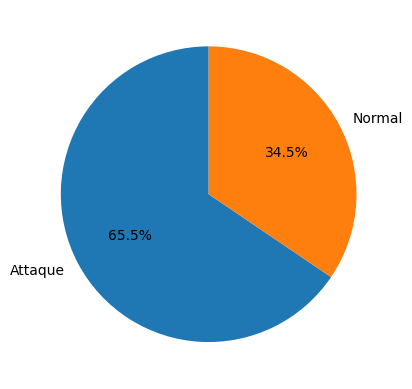

In [95]:
# Définissez les étiquettes pour les valeurs 0 et 1
labels = ['Attaque', 'Normal']
value_counts = train["label"].value_counts(normalize=True) 
# Créez le diagramme circulaire avec les étiquettes
plt.pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90)

label
1.0    10524
0.0     5537
Name: count, dtype: int64

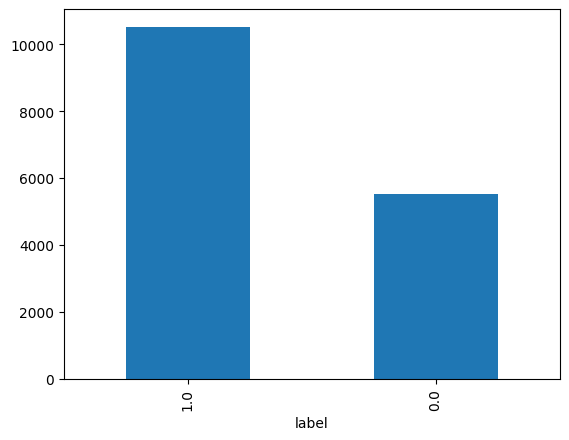

In [96]:
train["label"].value_counts().plot.bar()
train['label'].value_counts()

In [97]:
# explorer les caractéristiques catégorielles
print('Ensemble d\'entraînement:')
for col_name in train.columns:
    if train[col_name].dtypes == 'object' :
        unique_cat = len(train[col_name].unique())
        print("La caractéristique '{col_name}' a {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))


Ensemble d'entraînement:
La caractéristique 'URL' a 10525 categories


In [98]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=['URL']

train_categorical_values = train[categorical_columns]
print(train_categorical_values.head())

                                                 URL
0  http://www.eki-net.con-aescceccesaas.qfuhtb.to...
1  http://www.eki-net.con-aescceccesaas.qsnbpy.to...
2  http://www.eki-net.con-aescceccesaas.trea.top/...
3  http://www.eki-net.con-aescceccesaas.ucwxyw.to...
4  http://www.eki-net.con-aescceccesaas.vcuu.top/...


In [99]:
from sklearn.preprocessing import LabelEncoder

# Assuming train_categorical_values contains your categorical values

# Convert all elements in the DataFrame to strings
train_categorical_values_str = train_categorical_values.astype(str)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column in train_categorical_values_str
train_enc = train_categorical_values_str.apply(label_encoder.fit_transform)

# Print the original categorical values and their encoded versions
print(train_categorical_values.head())
print('--------------------')
print(train_enc.head())


                                                 URL
0  http://www.eki-net.con-aescceccesaas.qfuhtb.to...
1  http://www.eki-net.con-aescceccesaas.qsnbpy.to...
2  http://www.eki-net.con-aescceccesaas.trea.top/...
3  http://www.eki-net.con-aescceccesaas.ucwxyw.to...
4  http://www.eki-net.con-aescceccesaas.vcuu.top/...
--------------------
    URL
0  4091
1  4092
2  4093
3  4094
4  4095


In [100]:
# Colonnes à remplacer
colonnes_a_remplacer = ['URL']
# Remplacer les valeurs dans data1 par celles de data2
train[colonnes_a_remplacer] = train_enc[colonnes_a_remplacer]

train.head()

,has_title,has_input,has_button,has_image,has_submit,has_link,has_password,has_email_input,has_hidden_element,has_audio,...,has_text_input,number_of_meta,has_nav,has_object,has_picture,number_of_sources,number_of_span,number_of_table,URL,label
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,8.0,1.0,4091,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,4092,1.0
2,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,18.0,0.0,0.0,0.0,0.0,2.0,0.0,4093,1.0
3,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,26.0,1.0,0.0,1.0,44.0,27.0,0.0,4094,1.0
4,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,20.0,0.0,0.0,0.0,2.0,31.0,0.0,4095,1.0


In [101]:
train = train.drop(columns=['URL'])

In [63]:
# Liste des colonnes importantes pour la détection d'attaques
colonnes_importants = [ 'URL', 'label']
# Supprimer toutes les colonnes sauf celles qui sont importantes
colonnes_a_supprimer = [colonne for colonne in train.columns if colonne not in colonnes_importants]
train = train.drop(columns=colonnes_a_supprimer)

# Prétraitements convenables des données .

## 1.standarisation

In [102]:
#train
Scaler=StandardScaler().fit(train)
Scaler.transform(train)

array([[ 0.6333706 ,  1.03998628, -0.83065702, ..., -0.20386719,
         0.10881778,  0.72534871],
       [ 0.6333706 ,  1.03998628, -0.83065702, ..., -0.22889345,
        -0.09058009,  0.72534871],
       [ 0.6333706 ,  1.03998628,  1.09392209, ..., -0.22531827,
        -0.09058009,  0.72534871],
       ...,
       [-1.22803201, -0.87464229, -0.83065702, ..., -0.23246863,
        -0.09058009, -1.37864725],
       [-1.22803201, -0.87464229, -0.83065702, ..., -0.23246863,
        -0.09058009, -1.37864725],
       [-1.22803201, -0.87464229, -0.83065702, ..., -0.23246863,
        -0.09058009, -1.37864725]])

## 2.normalisation

In [103]:
#train
Scaler=Normalizer().fit(train)
Scaler.transform(train)


array([[0.00415615, 0.00415615, 0.        , ..., 0.03324916, 0.00415615,
        0.00415615],
       [0.00272591, 0.00272591, 0.        , ..., 0.00272591, 0.        ,
        0.00272591],
       [0.00131574, 0.00131574, 0.00131574, ..., 0.00263148, 0.        ,
        0.00131574],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## 3.mise a l'échelle

In [104]:
#train
Scaler=MinMaxScaler(feature_range=(0,1))
Scaler.fit_transform(train)



array([[5.00000000e-01, 5.00000000e-01, 0.00000000e+00, ...,
        3.12426775e-04, 3.49650350e-03, 1.00000000e+00],
       [5.00000000e-01, 5.00000000e-01, 0.00000000e+00, ...,
        3.90533469e-05, 0.00000000e+00, 1.00000000e+00],
       [5.00000000e-01, 5.00000000e-01, 5.00000000e-01, ...,
        7.81066937e-05, 0.00000000e+00, 1.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

# separation jeu d'entrainement et de test

In [105]:
# Diviser les données en ensembles d'entraînement et de test
X = train.drop(columns=['label'])  # Caractéristiques
y = train['label']  # Variable cible
# Fractionnement des données en train et ensemble de test 
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=25)
# Imprimer les formes des nouveaux ensembles
print("Forme de X_train :", X_train.shape)
print("Forme de X_test :", X_test.shape)
print("Forme de y_train :", y_train.shape)
print("Forme de y_test :", y_test.shape)

Forme de X_train : (11242, 43)
Forme de X_test : (4819, 43)
Forme de y_train : (11242,)
Forme de y_test : (4819,)


# modele XGBCLASSIFIER

In [106]:
# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

# Create and train the XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
# Predict on the test set
xgb_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, xgb_pred)
report = classification_report(y_test, xgb_pred)
conf_matrix = confusion_matrix(y_test, xgb_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1614
         1.0       1.00      1.00      1.00      3205

    accuracy                           1.00      4819
   macro avg       1.00      1.00      1.00      4819
weighted avg       1.00      1.00      1.00      4819


Recall  1.0
F1- Score   1.0

Temps d'exécution Détection de primitives : 0.8887007236480713 secondes


[[1614    0]
 [   0 3205]]


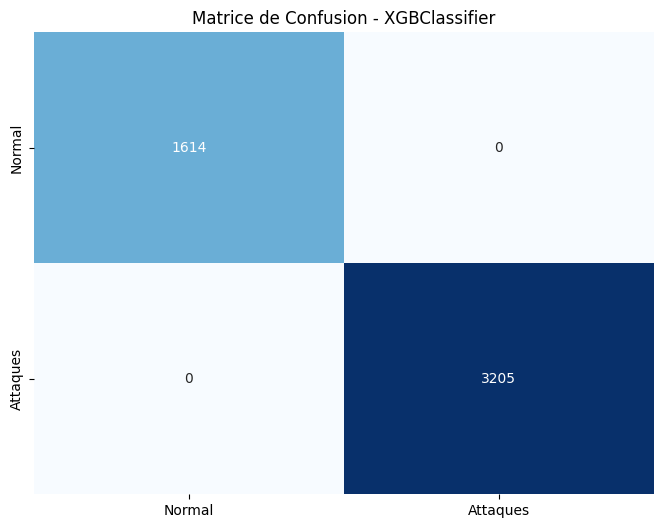

In [107]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, xgb_pred)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Afficher la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - XGBClassifier')
plt.show()

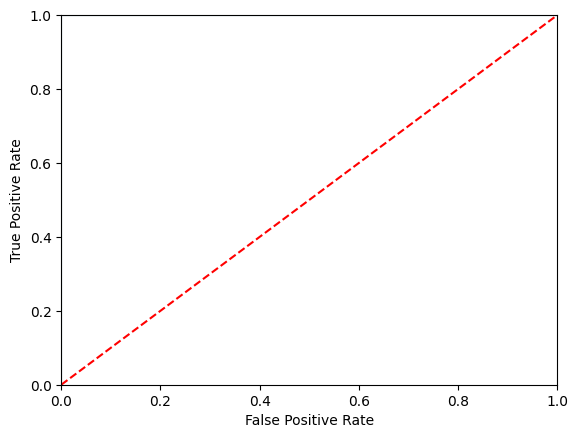

Area Under the Curve  1.0


In [108]:
# Calculate AUC
SVM_auc = roc_auc_score(y_test, xgb_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, xgb_pred)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % SVM_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', SVM_auc)

In [109]:
import pickle
with open('XGBOSST.pkl', 'wb') as file:
    # Utiliser pickle pour sérialiser et sauvegarder le modèle dans le fichier
    pickle.dump(xgb_model, file)

# modèle Régression logistique

In [110]:
# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, logistic_predictions)
accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Logistic Regression Accuracy: 1.00
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1614
         1.0       1.00      1.00      1.00      3205

    accuracy                           1.00      4819
   macro avg       1.00      1.00      1.00      4819
weighted avg       1.00      1.00      1.00      4819


Recall  0.9996879875195008
F1- Score   0.9998439694180059

Temps d'exécution Détection de primitives : 0.28155064582824707 secondes


[[1614    0]
 [   1 3204]]


<function matplotlib.pyplot.show(close=None, block=None)>

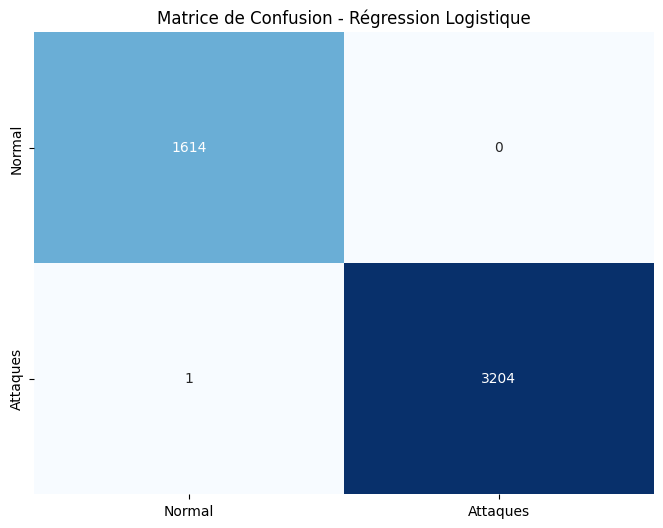

In [111]:
# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_test, logistic_predictions)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Affichage de la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - Régression Logistique')
plt.show

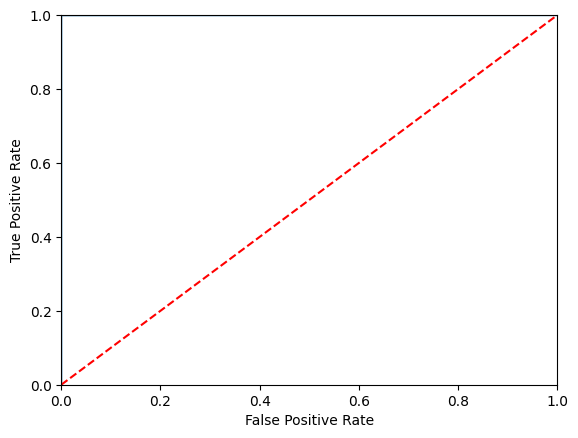

Area Under the Curve  0.9998439937597504


In [112]:
# Calculate AUC
logistic_auc = roc_auc_score(y_test, logistic_predictions)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, logistic_predictions)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % logistic_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', logistic_auc)

In [113]:
with open('LogisticReg.pkl', 'wb') as file:
    # Utiliser pickle pour sérialiser et sauvegarder le modèle dans le fichier
    pickle.dump(logistic_model, file)

# modele Random forest

In [114]:
# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=100, max_depth=10)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1614
         1.0       1.00      1.00      1.00      3205

    accuracy                           1.00      4819
   macro avg       1.00      1.00      1.00      4819
weighted avg       1.00      1.00      1.00      4819


Recall  1.0
F1- Score   1.0

Temps d'exécution Détection de primitives : 1.1698741912841797 secondes


[[1614    0]
 [   0 3205]]


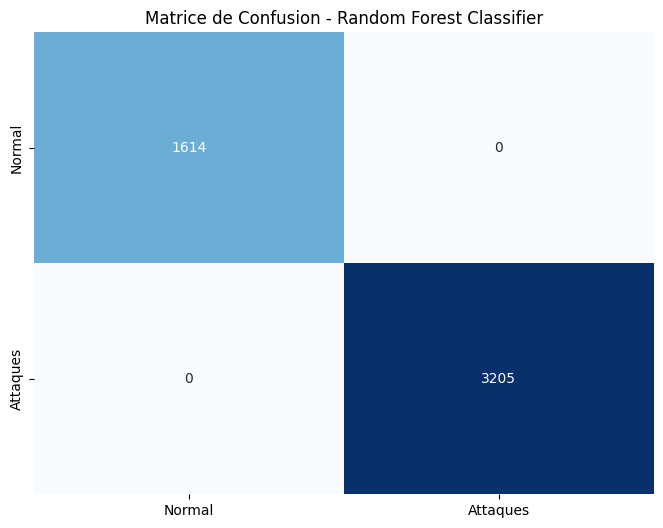

In [115]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Afficher la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - Random Forest Classifier')
plt.show()

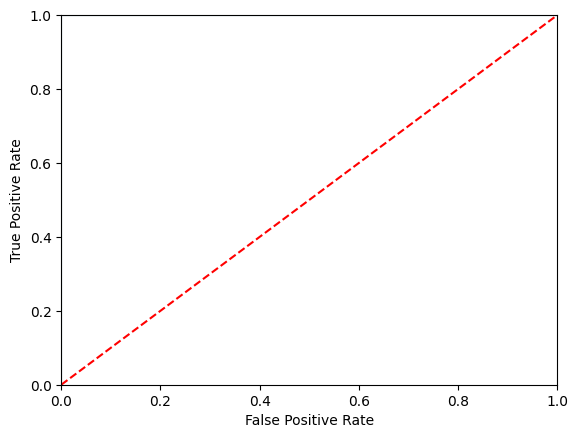

Area Under the Curve  1.0


In [116]:
# Calculate AUC
RandomForest_auc = roc_auc_score(y_test, y_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % RandomForest_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', RandomForest_auc)

In [117]:
with open('RandomForest.pkl', 'wb') as file:
    # Utiliser pickle pour sérialiser et sauvegarder le modèle dans le fichier
    pickle.dump(rf_classifier, file)

# modele Decision Tree

In [118]:
# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

# Create and train the decision tree
DecisionTree = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5, min_samples_leaf=100, min_samples_split=100)
DecisionTree.fit(X_train, y_train)
# Predict on the test set
DecisionTree_pred = DecisionTree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, DecisionTree_pred)
report = classification_report(y_test, DecisionTree_pred)
conf_matrix = confusion_matrix(y_test, DecisionTree_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.9997924880680639
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1614
         1.0       1.00      1.00      1.00      3205

    accuracy                           1.00      4819
   macro avg       1.00      1.00      1.00      4819
weighted avg       1.00      1.00      1.00      4819


Recall  0.9996879875195008
F1- Score   0.9998439694180059

Temps d'exécution Détection de primitives : 0.138810396194458 secondes


[[1614    0]
 [   1 3204]]


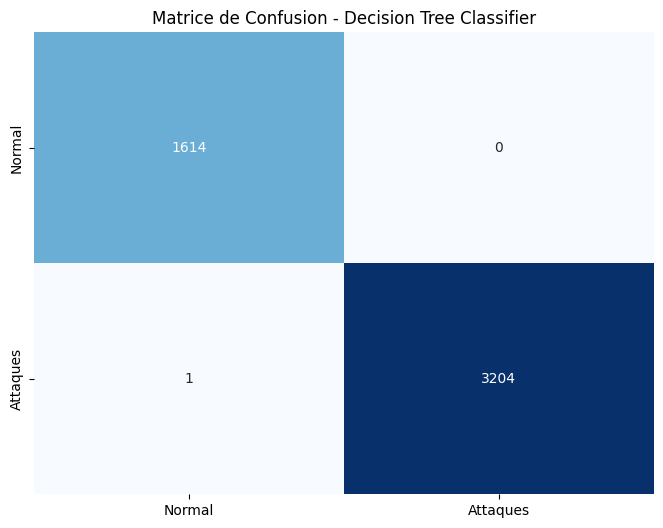

In [119]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, DecisionTree_pred)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Afficher la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - Decision Tree Classifier')
plt.show()

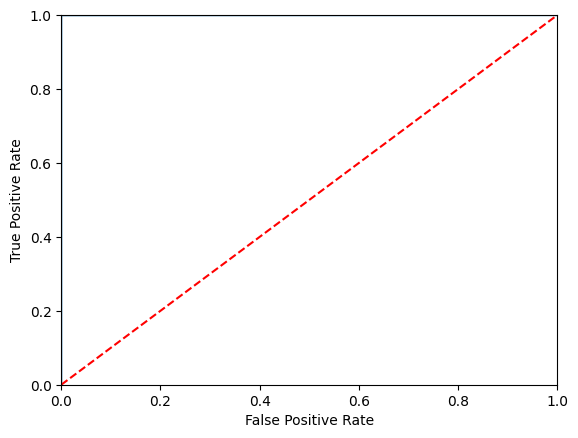

Area Under the Curve  0.9998439937597504


In [120]:
# Calculate AUC
DecisionTree_auc = roc_auc_score(y_test, DecisionTree_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, DecisionTree_pred)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % DecisionTree_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', DecisionTree_auc)

In [121]:
with open('DecisionTree.pkl', 'wb') as file:
    # Utiliser pickle pour sérialiser et sauvegarder le modèle dans le fichier
    pickle.dump(DecisionTree, file)

# Modele Support Vector Machines

## fonction rbf

In [42]:
# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

# Create and train the SVC
SVM = SVC(kernel = 'rbf')
SVM.fit(X_train, y_train)
# Predict on the test set
SVM_pred = SVM.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, SVM_pred)
report = classification_report(y_test, SVM_pred)
conf_matrix = confusion_matrix(y_test, SVM_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")

Model Accuracy: 0.9055820709690807
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88      1614
         1.0       1.00      0.86      0.92      3205

    accuracy                           0.91      4819
   macro avg       0.89      0.93      0.90      4819
weighted avg       0.93      0.91      0.91      4819


Recall  0.858034321372855
F1- Score   0.9235936188077246

Temps d'exécution Détection de primitives : 5.681185483932495 secondes


[[1614    0]
 [ 455 2750]]


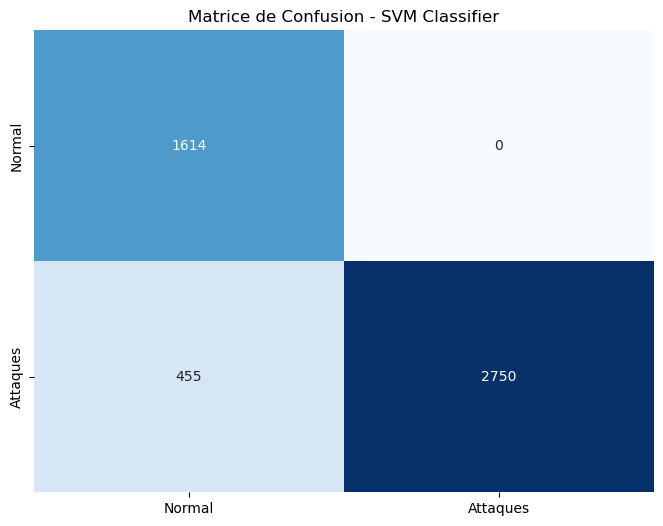

In [43]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, SVM_pred)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Afficher la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - SVM Classifier')
plt.show()

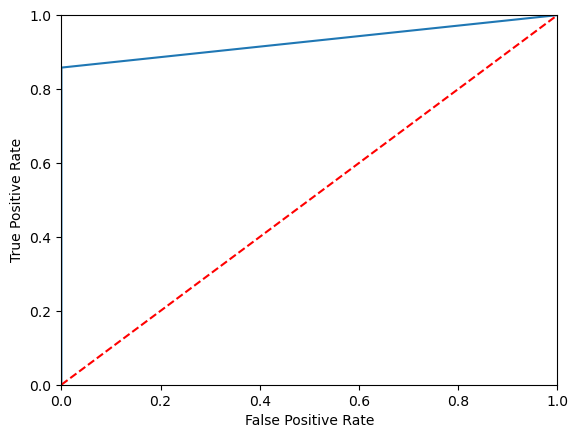

Area Under the Curve  0.9290171606864275


In [44]:
# Calculate AUC
SVM_auc = roc_auc_score(y_test, SVM_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, SVM_pred)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % SVM_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', SVM_auc)

# fonction linéaire

In [122]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

# Create and train the SVC with linear kernel
SVM = SVC(kernel='linear')
SVM.fit(X_train, y_train)
# Predict on the test set
SVM_pred = SVM.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, SVM_pred)
report = classification_report(y_test, SVM_pred)
conf_matrix = confusion_matrix(y_test, SVM_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")


Model Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1614
         1.0       1.00      1.00      1.00      3205

    accuracy                           1.00      4819
   macro avg       1.00      1.00      1.00      4819
weighted avg       1.00      1.00      1.00      4819


Recall  1.0
F1- Score   1.0

Temps d'exécution Détection de primitives : 0.15858054161071777 secondes


[[1614    0]
 [   0 3205]]


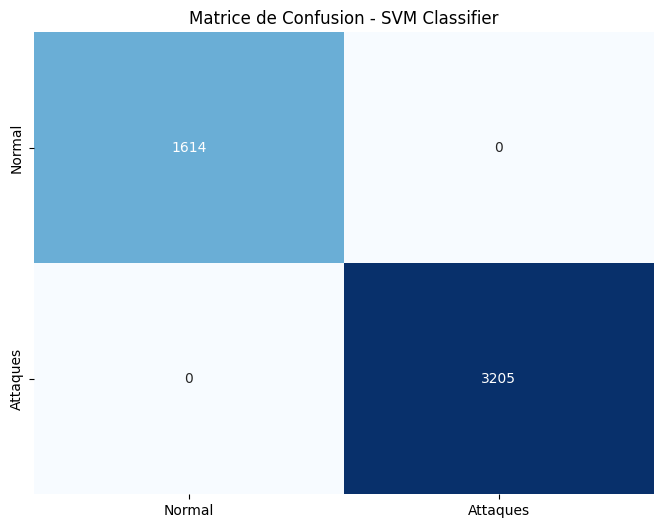

In [123]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, SVM_pred)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Afficher la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - SVM Classifier')
plt.show()

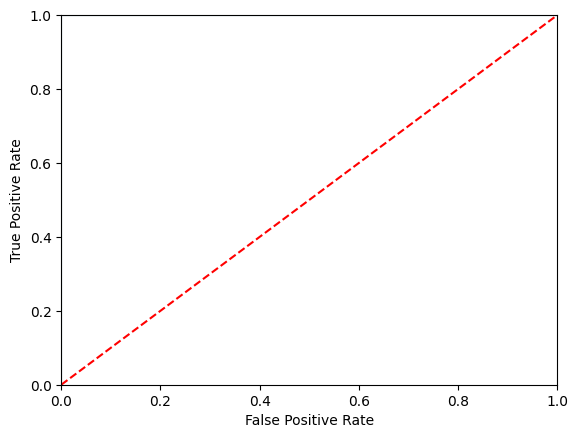

Area Under the Curve  1.0


In [124]:
# Calculate AUC
SVM_auc = roc_auc_score(y_test, SVM_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, SVM_pred)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % SVM_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', SVM_auc)

In [125]:
with open('SVC.pkl', 'wb') as file:
    # Utiliser pickle pour sérialiser et sauvegarder le modèle dans le fichier
    pickle.dump(SVM, file)

## fonction polynomial

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

# Create and train the SVC with polynomial kernel
SVM = SVC(kernel='poly', degree=3)  
SVM.fit(X_train, y_train)
# Predict on the test set
SVM_pred = SVM.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, SVM_pred)
report = classification_report(y_test, SVM_pred)
conf_matrix = confusion_matrix(y_test, SVM_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")


Model Accuracy: 0.7115584146088401
Classification Report:
               precision    recall  f1-score   support

         0.0       0.54      1.00      0.70      1614
         1.0       1.00      0.57      0.72      3205

    accuracy                           0.71      4819
   macro avg       0.77      0.78      0.71      4819
weighted avg       0.85      0.71      0.72      4819


Recall  0.5663026521060842
F1- Score   0.7231075697211156

Temps d'exécution Détection de primitives : 24.058905124664307 secondes


[[1614    0]
 [1390 1815]]


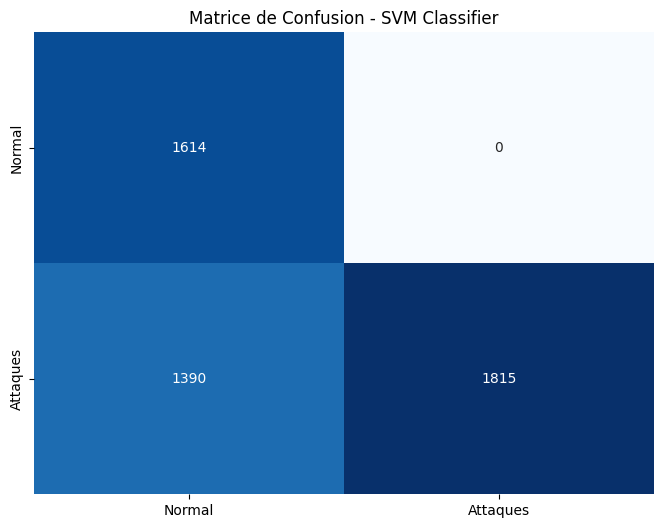

In [37]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, SVM_pred)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Afficher la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - SVM Classifier')
plt.show()

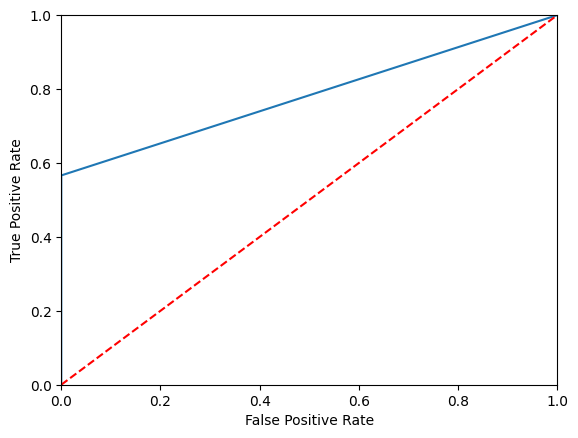

Area Under the Curve  0.783151326053042


In [38]:
# Calculate AUC
SVM_auc = roc_auc_score(y_test, SVM_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, SVM_pred)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % SVM_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', SVM_auc)

## fonction sigmoïde

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# Avant d'exécuter le code, on mémorise le temps de départ
start = time.time()
# Début du chronomètre
start_time = time.time()

# Create and train the SVC with sigmoid kernel
SVM = SVC(kernel='sigmoid')
SVM.fit(X_train, y_train)
# Predict on the test set
SVM_pred = SVM.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, SVM_pred)
report = classification_report(y_test, SVM_pred)
conf_matrix = confusion_matrix(y_test, SVM_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)
print()
recall1 = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[1,0]))
prec1  = float(conf_matrix[1, 1]/(conf_matrix[1,1]+conf_matrix[0,1]))
f_score1 = (2*recall1*prec1)/(recall1 + prec1)
print('Recall ', recall1)
print('F1- Score  ', f_score1)
print()
# Fin du chronomètre
end_time = time.time()
# Calcul du temps d'exécution
execution_time = end_time - start_time
print(f"Temps d'exécution Détection de primitives : {execution_time} secondes")


Model Accuracy: 0.8981116414193816
Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      1.00      0.87      1614
         1.0       1.00      0.85      0.92      3205

    accuracy                           0.90      4819
   macro avg       0.88      0.92      0.89      4819
weighted avg       0.92      0.90      0.90      4819


Recall  0.846801872074883
F1- Score   0.9170467984456834

Temps d'exécution Détection de primitives : 6.199121475219727 secondes


[[1614    0]
 [ 491 2714]]


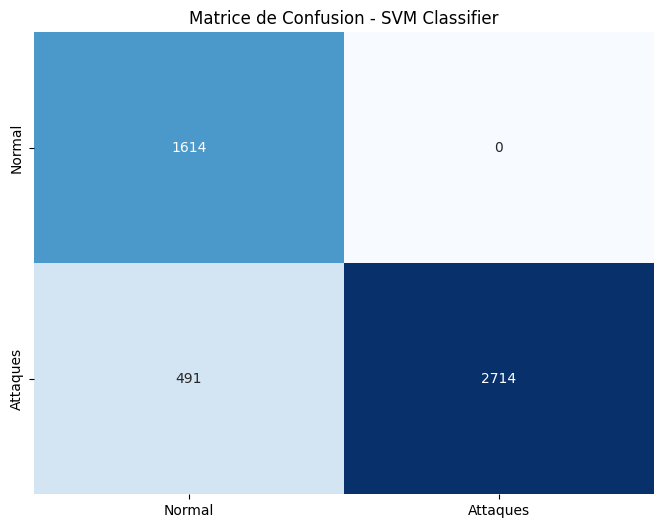

In [40]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, SVM_pred)
print(conf_matrix)
# Définir l'ordre des classes
class_names = ['Normal', 'Attaques']

# Afficher la matrice de confusion sous forme de heatmap avec annotations
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matrice de Confusion - SVM Classifier')
plt.show()

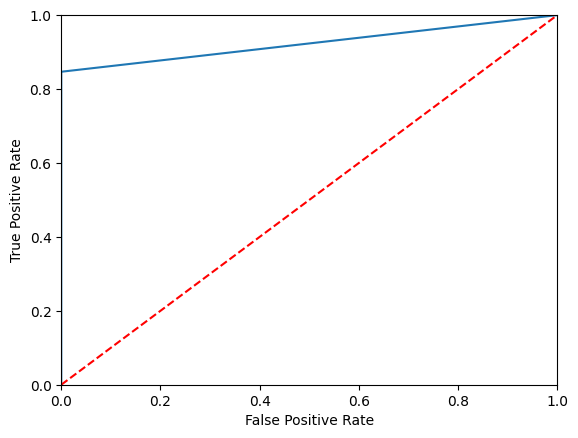

Area Under the Curve  0.9234009360374416


In [41]:
# Calculate AUC
SVM_auc = roc_auc_score(y_test, SVM_pred)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, SVM_pred)
plt.plot(fpr, tpr, label=' Classifier (area = %0.2f)' % SVM_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under the Curve ', SVM_auc)